In [1]:
from causalscore import *
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as bnvsbn
%load_ext autoreload
%autoreload 2

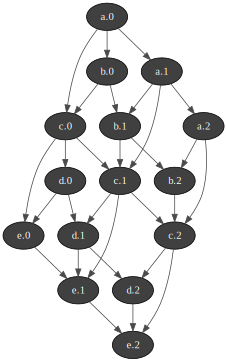

In [2]:
generator = Generator(nodes=5, timesteps=3, values=2, score="BDEU")
twodbn = generator.generate_structure()
true_dbn = generator.generate_DBN(twodbn)
gnb.show(true_dbn)

In [3]:
data = generator.generate_data(items=10000)
data

,a.0,b.0,c.0,d.0,e.0,a.1,b.1,c.1,d.1,e.1,a.2,b.2,c.2,d.2,e.2
0,0,0,1,1,0,1,1,1,1,0,0,1,0,1,1
1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0
2,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1
9996,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1
9997,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0
9998,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1


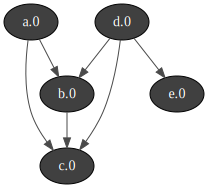

In [4]:
causal = generator.learn_causal_structure(10000)
gnb.show(causal)

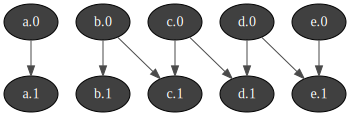

{(0, 5), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9)}

In [5]:
learned = generator.learn_time_structure(10000,times=2)
gnb.show(learned)
learned.arcs()

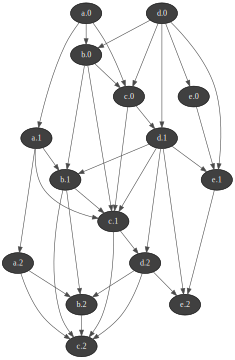

In [6]:
learned = generator.get_structure()
gnb.show(learned)

In [7]:
# CausalScore(true_dbn, learned)

In [8]:
gcmp=bnvsbn.GraphicalBNComparator(true_dbn,learned)
gnb.flow.add(bnvsbn.graphDiff(true_dbn,learned))
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.new_line()
gnb.flow.add_html("<br/>".join([f"{k} : {v:.2f}" for k,v in gcmp.skeletonScores().items() if k!='count']),"Skeleton scores")
gnb.flow.add_html("<br/>".join([f"{k} : {v:.2f}" for k,v in gcmp.scores().items() if k!='count']),"Scores")

gnb.flow.display()

In [14]:
common_effects = 0.5
common_causes = 0.5
islands = 1

nodes = 10
timesteps = 2
datapoints = 1000
values = 2
method = 'HC'
scorefunction = 'BDEU'

In [16]:
structure_scores = {}
parameter_scores = {}

generator = Generator(nodes=nodes, timesteps=timesteps, values=values, islands=islands, common_effects=common_effects, common_causes=common_causes, algorithm=method, score=scorefunction)
twodbn = generator.generate_structure()
# TODO: PICKLE STRUCTURE
for _ in range(4):#1000):
    generator.generate_DBN(twodbn)
    generator.generate_data(items=datapoints)
    for subpoints in [int(np.ceil(datapoints/10*i)) for i in range(1,11)]:
        generator.learn_causal_structure(subpoints)
        generator.learn_time_structure(subpoints)
        generator.get_structure()

#         score = {k:[v] for k,v in generator.compare(subpoints).items()}
        structure_score, parameter_score = generator.compare(subpoints)
        structure_score = {k:[v] for k,v in structure_score.items()}
        parameter_score = {k:[v] for k,v in parameter_score.items()}

        if structure_scores:
            for key, value in structure_scores.items():
                structure_scores[key] = value + structure_score[key]
        else:
            structure_scores = structure_score
            
        if parameter_scores:
            for key, value in parameter_scores.items():
                parameter_scores[key] = value + parameter_score[key]
        else:
            parameter_scores = parameter_score

display(pd.DataFrame(structure_scores))
display(pd.DataFrame(parameter_scores))

,items,nodes,timesteps,values,causes,effects,algorithm,score,recall,precision,fscore,dist2opt,tp,tn,fp,fn
0,100,10,2,2,0.5,0.5,HC,BDEU,0.452381,0.791667,0.575758,0.585909,19,143,5,23
1,200,10,2,2,0.5,0.5,HC,BDEU,0.547619,0.958333,0.696970,0.454296,23,147,1,19
2,300,10,2,2,0.5,0.5,HC,BDEU,0.690476,0.906250,0.783784,0.323410,29,145,3,13
3,400,10,2,2,0.5,0.5,HC,BDEU,0.595238,0.961538,0.735294,0.406585,25,147,1,17
4,500,10,2,2,0.5,0.5,HC,BDEU,0.690476,0.966667,0.805556,0.311314,29,147,1,13
5,600,10,2,2,0.5,0.5,HC,BDEU,0.642857,0.931034,0.760563,0.363741,27,146,2,15
6,700,10,2,2,0.5,0.5,HC,BDEU,0.690476,0.935484,0.794521,0.316176,29,146,2,13
7,800,10,2,2,0.5,0.5,HC,BDEU,0.714286,0.967742,0.821918,0.287530,30,147,1,12
8,900,10,2,2,0.5,0.5,HC,BDEU,0.785714,0.942857,0.857143,0.221774,33,146,2,9
9,1000,10,2,2,0.5,0.5,HC,BDEU,0.785714,0.916667,0.846154,0.229919,33,145,3,9


,items,nodes,timesteps,values,causes,effects,algorithm,score,recall,precision,fscore,dist2opt,tp,tn,fp,fn
0,100,10,2,2,0.5,0.5,HC,BDEU,0.261905,0.458333,0.333333,0.915526,11,325,13,31
1,200,10,2,2,0.5,0.5,HC,BDEU,0.214286,0.375000,0.272727,1.003978,9,323,15,33
2,300,10,2,2,0.5,0.5,HC,BDEU,0.166667,0.218750,0.189189,1.142277,7,313,25,35
3,400,10,2,2,0.5,0.5,HC,BDEU,0.309524,0.500000,0.382353,0.852501,13,325,13,29
4,500,10,2,2,0.5,0.5,HC,BDEU,0.404762,0.566667,0.472222,0.736265,17,325,13,25
5,600,10,2,2,0.5,0.5,HC,BDEU,0.261905,0.379310,0.309859,0.964386,11,320,18,31
6,700,10,2,2,0.5,0.5,HC,BDEU,0.261905,0.354839,0.301370,0.980315,11,318,20,31
7,800,10,2,2,0.5,0.5,HC,BDEU,0.333333,0.451613,0.383562,0.863234,14,321,17,28
8,900,10,2,2,0.5,0.5,HC,BDEU,0.500000,0.600000,0.545455,0.640312,21,324,14,21
9,1000,10,2,2,0.5,0.5,HC,BDEU,0.214286,0.250000,0.230769,1.086208,9,311,27,33
